# Importing


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


#For ignoring warning
import warnings
warnings.filterwarnings("ignore")




# Reading data

In [2]:
cols = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "class"]
df = pd.read_csv("data/magic04.data", names=cols)
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [3]:
x = df.drop(columns="class")
y = df["class"]
y.value_counts()

class
g    12332
h     6688
Name: count, dtype: int64

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
df["class"] = (df["class"] == "g").astype(int)
#gamma = 1

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


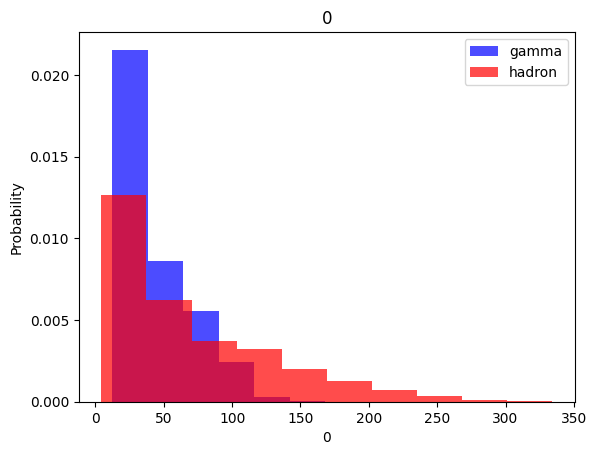

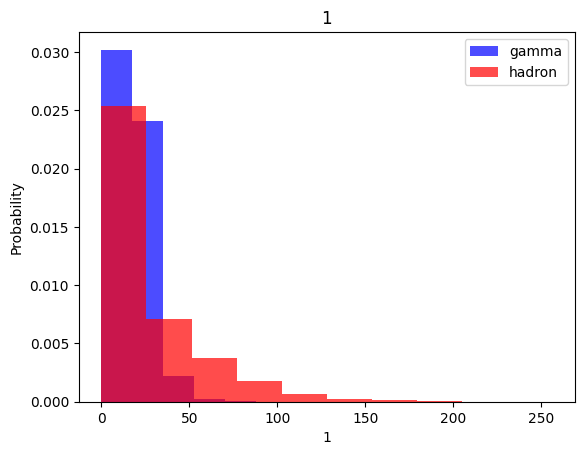

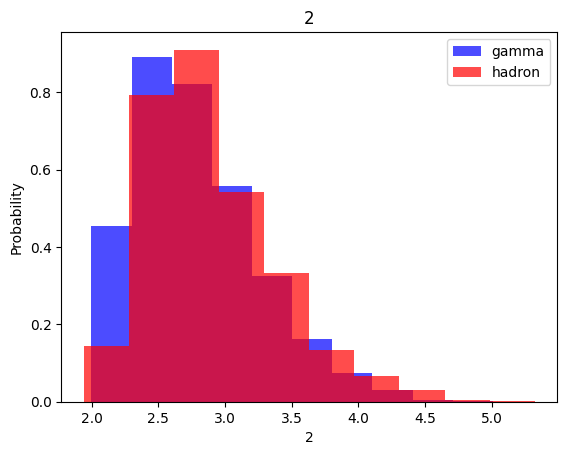

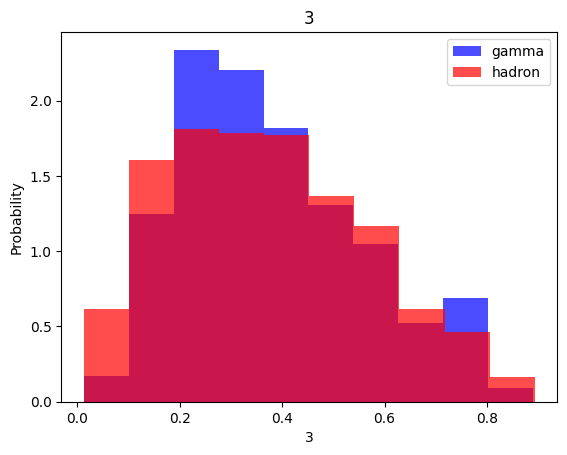

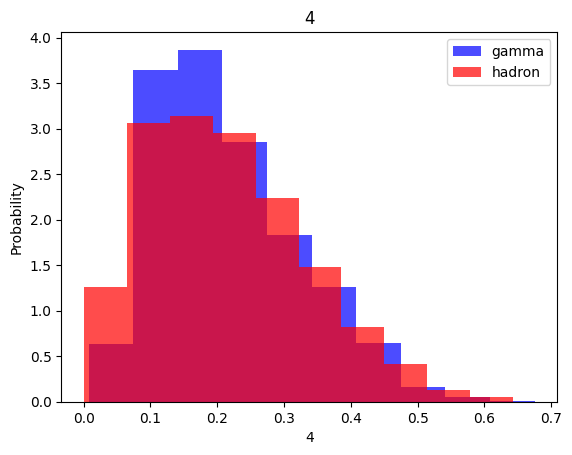

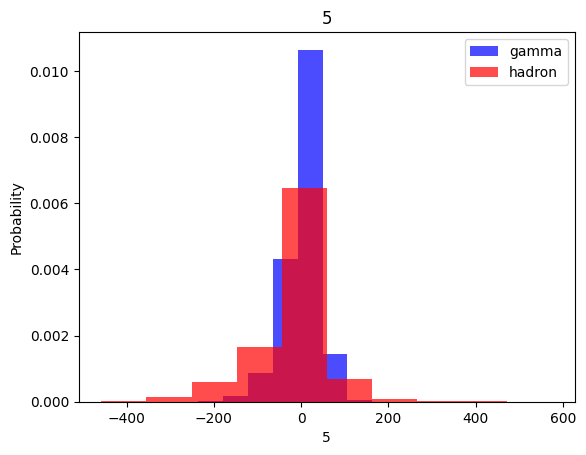

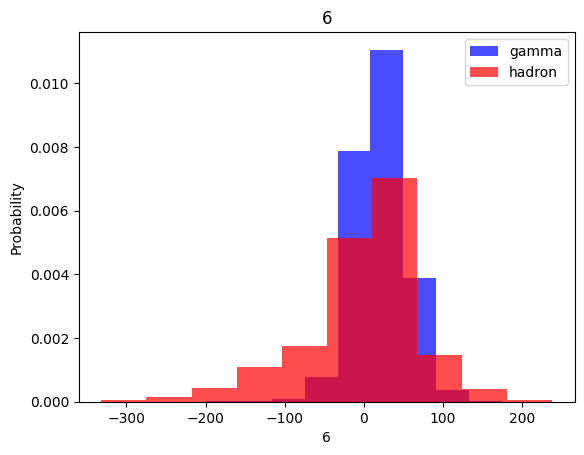

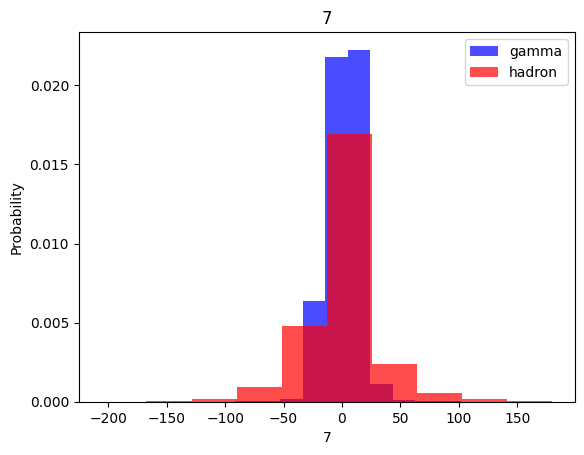

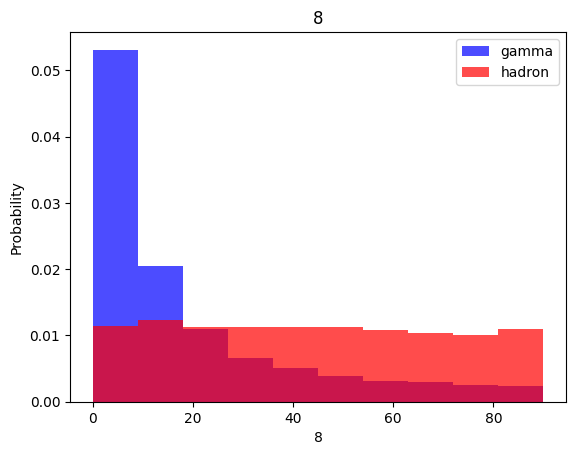

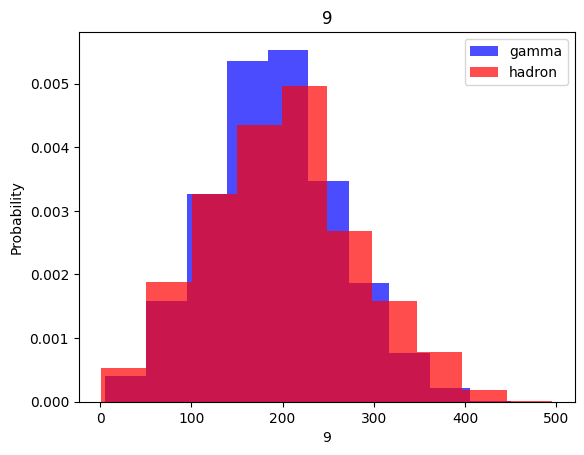

In [7]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#splitting and balancing

In [8]:
resampler = RandomUnderSampler(random_state=0)
x, y = resampler.fit_resample(x, y)
pd.DataFrame(y).value_counts()

class
g        6688
h        6688
Name: count, dtype: int64

In [9]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split,GridSearchCV
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0)

#Logistic model


In [10]:
model = LogisticRegression()
parameters = {
    'penalty': [None, 'l2'],
    'C': [0.01,0.1, 1, 10, 50]
}
grid_search = GridSearchCV(model,param_grid=parameters,cv=10,scoring="accuracy")
grid_search.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 50], 'penalty': [None, 'l2']},
             scoring='accuracy')

In [11]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.105201,0.008508,0.003599,0.000664,0.01,None,"{'C': 0.01, 'penalty': None}",0.744931,0.779082,0.769477,0.778846,0.771368,0.785256,0.745726,0.767094,0.767094,0.760684,0.766956,0.012745,6
1,0.105600,0.003878,0.003300,0.000460,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.753469,0.783351,0.775880,0.774573,0.798077,0.783120,0.758547,0.779915,0.772436,0.762821,0.774219,0.012556,1
2,0.104501,0.003776,0.003899,0.000539,0.1,None,"{'C': 0.1, 'penalty': None}",0.744931,0.779082,0.769477,0.778846,0.771368,0.785256,0.745726,0.767094,0.767094,0.760684,0.766956,0.012745,6
3,0.115704,0.009781,0.004296,0.000783,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.760939,0.778015,0.766275,0.774573,0.794872,0.782051,0.745726,0.770299,0.767094,0.761752,0.770160,0.012690,2
4,0.114701,0.006754,0.004099,0.000538,1,None,"{'C': 1, 'penalty': None}",0.744931,0.779082,0.769477,0.778846,0.771368,0.785256,0.745726,0.767094,0.767094,0.760684,0.766956,0.012745,6
5,0.102701,0.004314,0.003800,0.000600,1,l2,"{'C': 1, 'penalty': 'l2'}",0.750267,0.781217,0.760939,0.773504,0.784188,0.779915,0.748932,0.770299,0.763889,0.762821,0.767597,0.011766,4
6,0.102202,0.003793,0.003498,0.000669,10,None,"{'C': 10, 'penalty': None}",0.744931,0.779082,0.769477,0.778846,0.771368,0.785256,0.745726,0.767094,0.767094,0.760684,0.766956,0.012745,6
7,0.101700,0.004101,0.003399,0.000490,10,l2,"{'C': 10, 'penalty': 'l2'}",0.754536,0.778015,0.765208,0.773504,0.774573,0.791667,0.750000,0.768162,0.775641,0.760684,0.769199,0.011595,3
8,0.119701,0.014150,0.003900,0.000700,50,None,"{'C': 50, 'penalty': None}",0.744931,0.779082,0.769477,0.778846,0.771368,0.785256,0.745726,0.767094,0.767094,0.760684,0.766956,0.012745,6
9,0.101801,0.002638,0.003700,0.000459,50,l2,"{'C': 50, 'penalty': 'l2'}",0.748132,0.781217,0.769477,0.773504,0.773504,0.780983,0.748932,0.768162,0.767094,0.759615,0.767062,0.011076,5


In [12]:
print(grid_search.best_params_)


{'C': 0.01, 'penalty': 'l2'}


In [13]:
selected_results = results[["param_penalty", "param_C", "mean_test_score"]]
selected_results

,param_penalty,param_C,mean_test_score
0,None,0.01,0.766956
1,l2,0.01,0.774219
2,None,0.1,0.766956
3,l2,0.1,0.770160
4,None,1,0.766956
5,l2,1,0.767597
6,None,10,0.766956
7,l2,10,0.769199
8,None,50,0.766956
9,l2,50,0.767062


In [14]:
from sklearn.metrics import classification_report
lg_prediction = grid_search.best_estimator_.predict(x_test)
print(classification_report(y_test,lg_prediction))


              precision    recall  f1-score   support

           g       0.73      0.83      0.77      1970
           h       0.81      0.70      0.75      2043

    accuracy                           0.76      4013
   macro avg       0.77      0.76      0.76      4013
weighted avg       0.77      0.76      0.76      4013



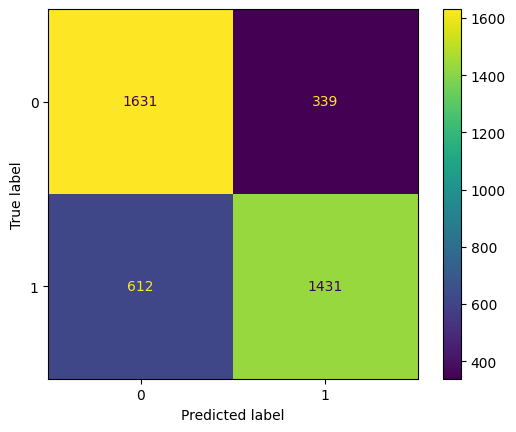

In [15]:
matrix = confusion_matrix(y_test, lg_prediction)
display = ConfusionMatrixDisplay(matrix)
display.plot()

#KNN

In [16]:
#KNN Model
model = KNeighborsClassifier()

params = {
    "n_neighbors": list(range(3,20,2))
}
grid_search = GridSearchCV(model, param_grid=params, cv=10, return_train_score=True, scoring="accuracy")

In [17]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]},
             return_train_score=True, scoring='accuracy')

In [18]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.023303,0.002000,0.079097,0.002704,3,{'n_neighbors': 3},0.747065,0.782284,0.769477,0.764957,...,0.869096,0.870535,0.866738,0.867687,0.869942,0.867213,0.871010,0.872197,0.869403,0.001733
1,0.023401,0.001282,0.083999,0.004081,5,{'n_neighbors': 5},0.753469,0.785486,0.768410,0.771368,...,0.837052,0.839919,0.838377,0.834817,0.841106,0.838377,0.840750,0.841106,0.838774,0.001906
2,0.024201,0.002562,0.093000,0.015035,7,{'n_neighbors': 7},0.755603,0.790822,0.769477,0.771368,...,0.825777,0.824018,0.827459,0.821051,0.826391,0.825086,0.828765,0.826985,0.825554,0.002096
3,0.026003,0.003846,0.104299,0.020076,9,{'n_neighbors': 9},0.752401,0.791889,0.768410,0.776709,...,0.814265,0.813575,0.819509,0.809897,0.816779,0.814169,0.819390,0.814643,0.815468,0.002809
4,0.024591,0.001569,0.101000,0.006768,11,{'n_neighbors': 11},0.743863,0.786553,0.769477,0.782051,...,0.808806,0.806218,0.807523,0.802539,0.809659,0.805031,0.811202,0.807405,0.807149,0.002473
5,0.024799,0.001778,0.100308,0.006311,13,{'n_neighbors': 13},0.752401,0.791889,0.772679,0.783120,...,0.803822,0.804438,0.801234,0.796013,0.803845,0.802658,0.807286,0.802895,0.803019,0.002765
6,0.027700,0.004336,0.110708,0.014860,15,{'n_neighbors': 15},0.750267,0.788687,0.775880,0.777778,...,0.799193,0.795657,0.800878,0.793402,0.800641,0.798030,0.801234,0.797911,0.798450,0.002356
7,0.026523,0.002441,0.114699,0.015060,17,{'n_neighbors': 17},0.745998,0.774813,0.775880,0.774573,...,0.794683,0.793758,0.798386,0.789724,0.797793,0.792809,0.798267,0.793995,0.794961,0.002577
8,0.024400,0.002334,0.105803,0.008215,19,{'n_neighbors': 19},0.750267,0.781217,0.774813,0.770299,...,0.791004,0.793046,0.793995,0.786401,0.793639,0.788300,0.797199,0.789724,0.792161,0.003088


In [19]:
print(grid_search.best_params_)


{'n_neighbors': 15}


In [20]:
needed_results=results[['param_n_neighbors','mean_train_score','mean_test_score']]
needed_results

,param_n_neighbors,mean_train_score,mean_test_score
0,3,0.869403,0.760118
1,5,0.838774,0.767168
2,7,0.825554,0.769197
3,9,0.815468,0.768770
4,11,0.807149,0.767917
5,13,0.803019,0.770052
6,15,0.798450,0.770800
7,17,0.794961,0.770054
8,19,0.792161,0.769839


In [21]:
knn_prediction = grid_search.best_estimator_.predict(x_test)

print(classification_report(y_test, knn_prediction))

              precision    recall  f1-score   support

           g       0.71      0.85      0.78      1970
           h       0.83      0.67      0.74      2043

    accuracy                           0.76      4013
   macro avg       0.77      0.76      0.76      4013
weighted avg       0.77      0.76      0.76      4013



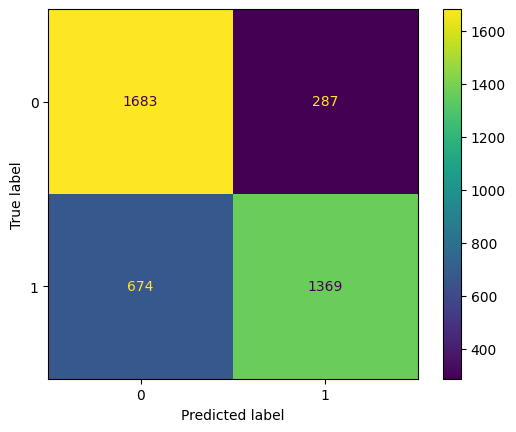

In [22]:
matrix = confusion_matrix(y_test, knn_prediction)
display = ConfusionMatrixDisplay(matrix)
display.plot()